<a href="https://colab.research.google.com/github/Sudeeksha29/CAPTION-GENERATOR/blob/main/project_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
adityajn105_flickr8k_path = kagglehub.dataset_download('adityajn105/flickr8k')

print('Data source import complete.')


Using Colab cache for faster access to the 'flickr8k' dataset.
Data source import complete.


In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
import tensorflow as tf
from tensorflow import keras
print("Tensorflow Version: ",tf.__version__)

Tensorflow Version:  2.19.0


In [ ]:
IMAGE_DIR = "/kaggle/input/flickr8k/Images"
captions_df = pd.read_csv("/kaggle/input/flickr8k/captions.txt")
captions_df.sample(5)

image  \
30769  3537474810_cf676b3259.jpg   
21039  3143991972_7193381aeb.jpg   
2017   1405221276_21634dcd58.jpg   
1493    133189853_811de6ab2a.jpg   
16150  2879241506_b421536330.jpg   

                                                 caption  
30769              Man in blue shirt kicks soccer ball .  
21039             Woman and baby waiting at an airport .  
2017   Two dogs shake off water in an area with very ...  
1493   One man kissing another man on the check and b...  
16150  A couple acting like they are swimming in fron...

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

In [ ]:
def show_images_with_captions(full_df,df_sample):
    unique_images = df_sample['image'].unique()

    # rows needed (4 per row)
    n_rows = (len(unique_images) + 3) // 4
    fig, axes = plt.subplots(n_rows, 4, figsize=(20, 5 * n_rows))
    axes = axes.flatten()

    for idx, filename in enumerate(unique_images):
        ax = axes[idx]
        # get all captions for this image from full dataframe
        all_captions = full_df[full_df['image'] == filename]['caption'].tolist()

        # image loading
        img = load_img(f"{IMAGE_DIR}/{filename}", color_mode='rgb')
        ax.imshow(img)
        ax.axis("off")

        # Add all captions below image
        captions_text = "\n".join([f"{i+1}. {cap}" for i, cap in enumerate(all_captions)])
        ax.text(
            0.5, -0.15, captions_text,
            transform=ax.transAxes,
            ha="center", va="top", fontsize=9, wrap=True
        )

    # hide extra axes
    for j in range(idx+1, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

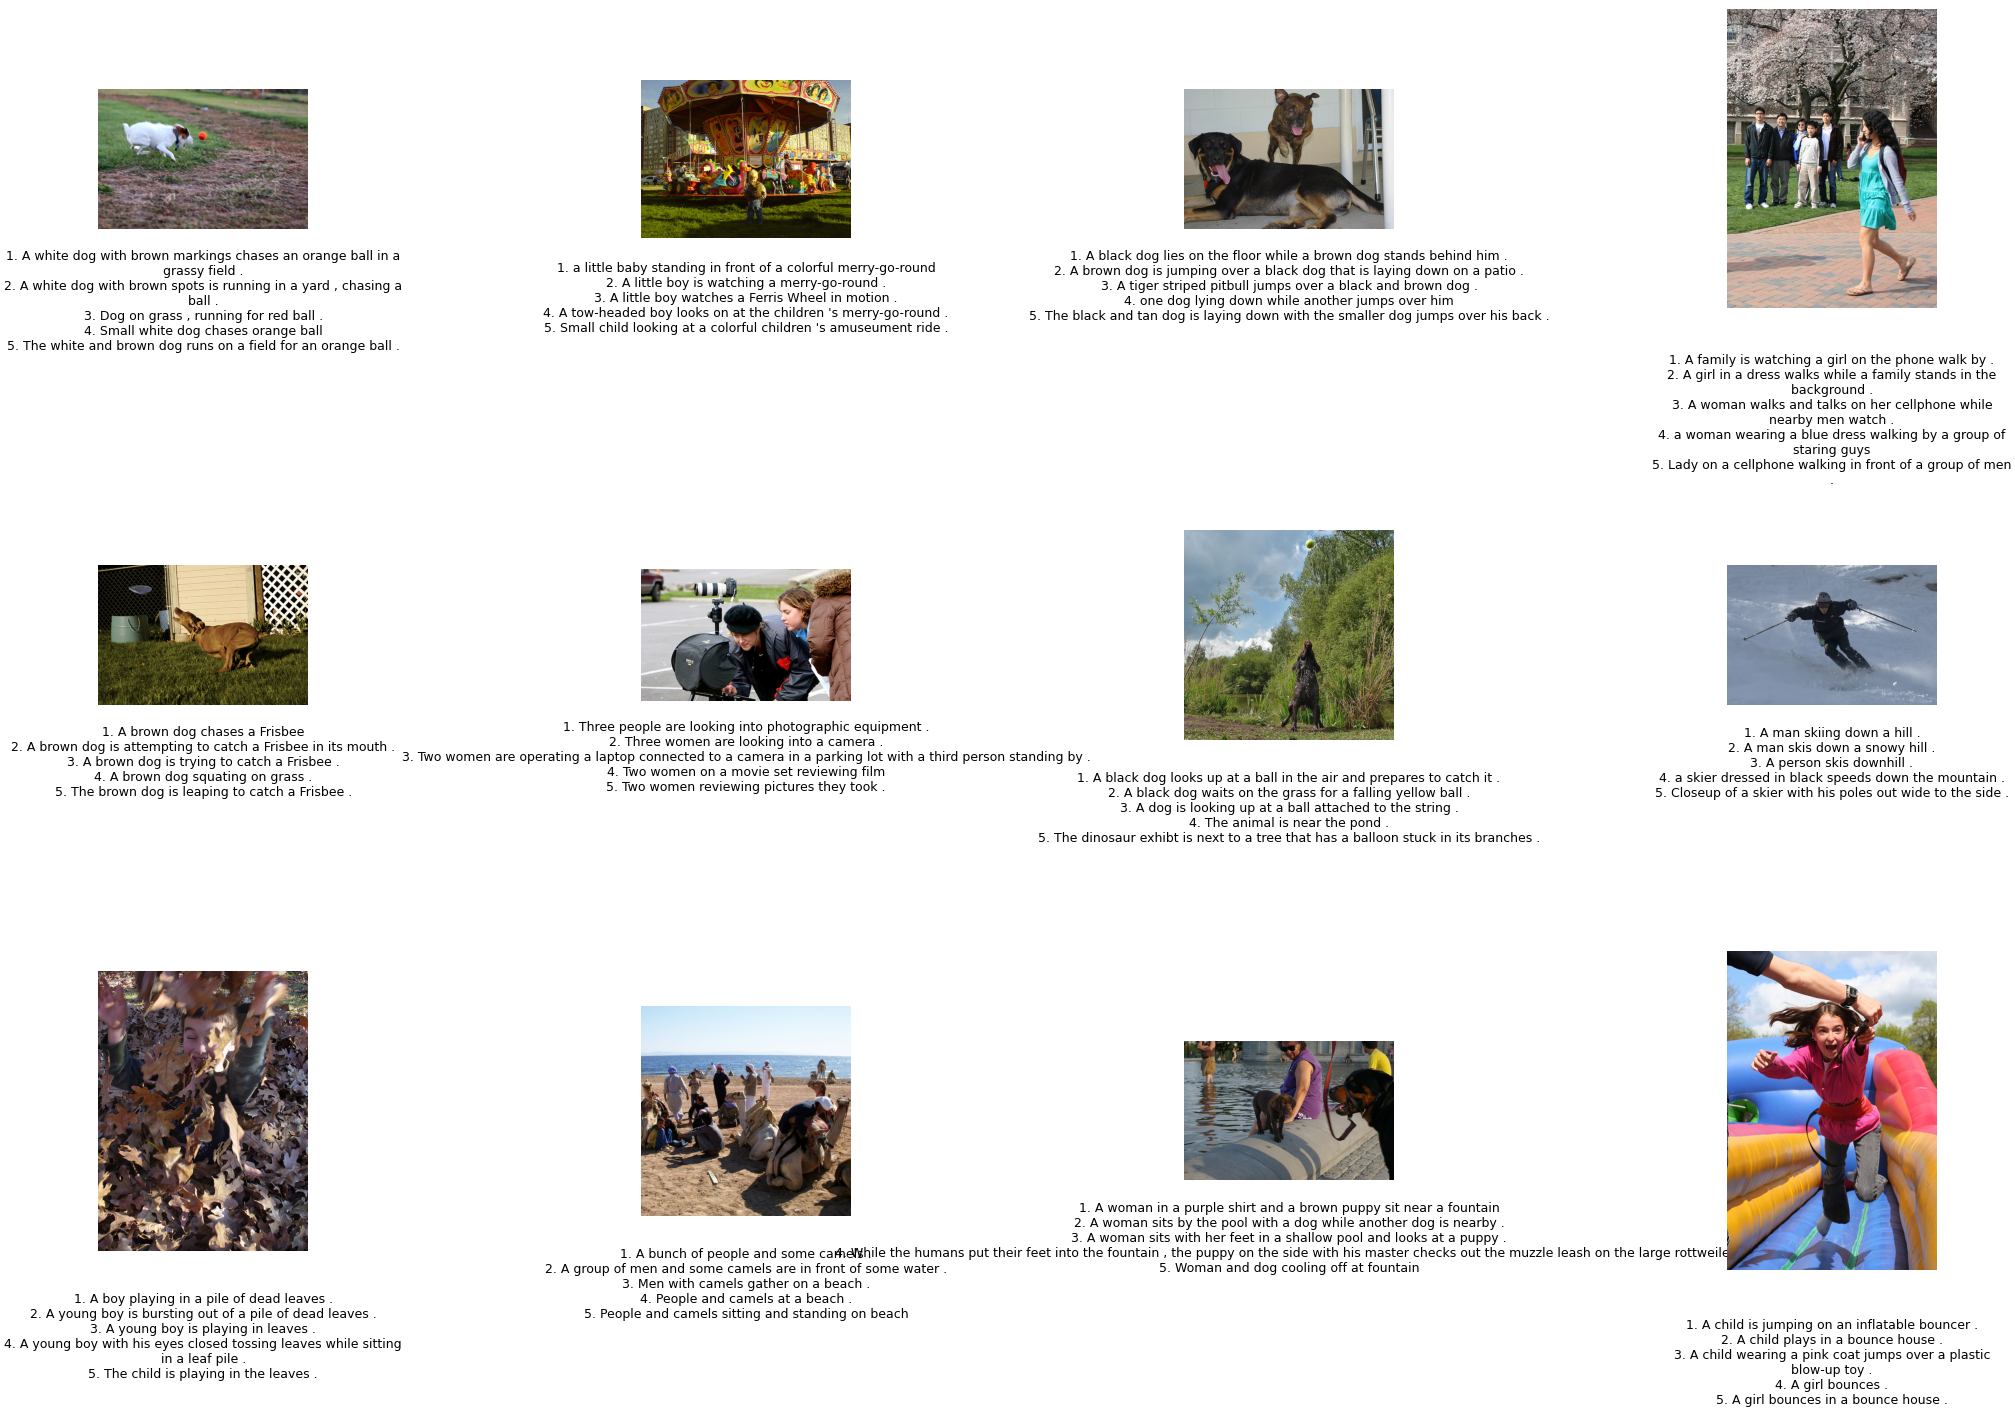

In [ ]:
show_images_with_captions(captions_df, captions_df.sample(12))

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tqdm import tqdm

In [ ]:
model = VGG16()
# removing last layer of model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
print(model.summary())

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,260,544 (512.16 MB)

 Trainable params: 134,260,544 (512.16 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
features = {}

# Loop through each unique image
for image in tqdm(captions_df['image'].unique().tolist()):
    img = load_img(os.path.join(IMAGE_DIR,image), target_size=(224,224))
    # convert image pixels to numpy array
    img = img_to_array(img)
    # preprocessing image for VGG
    img = preprocess_input(img)
    # model.predict expects a batch, i.e. (batch_size, 224, 224, 3).
    img = np.expand_dims(img, axis=0)  # makes shape (1,224,224,3)
    # feature extracting
    feature = model.predict(img,verbose=0)
    # image id
    image_id = image.split('.')[0]
    # storing feature
    features[image_id] = feature

100%|██████████| 8091/8091 [12:47<00:00, 10.54it/s]


In [ ]:
import pickle
with open("image_features.pkl", "wb") as f:
    pickle.dump(features, f)

In [ ]:
with open("image_features.pkl", "rb") as f:
    features = pickle.load(f)

In [ ]:
with open('/kaggle/input/flickr8k/captions.txt','r') as f:
    next(f)
    captions_docs = f.read()

In [ ]:
mapping = {}
# process line
for line in tqdm(captions_docs.split('\n')):
    # split line by comma(,)
    tokens = line.split(',')
    image_id, caption = tokens[0], tokens[1:]
    # removinf extension from image_id(.jpg)
    image_id = image_id.split('.')[0]
    # convert caption list to string
    caption = " ".join(caption)
    # create mapping
    if image_id not in mapping:
        mapping[image_id] = []
    # storing caption
    mapping[image_id].append(caption)

100%|██████████| 40456/40456 [00:00<00:00, 803538.17it/s]


In [ ]:
len(mapping)

8092

In [ ]:
def cleaning(mapping):
    for key, captions in mapping.items():
        # taking one caption at a time
        for i in range(len(captions)):
            caption = captions[i]
            # preprocessing
            # converting to lowercase
            caption = caption.lower()
            # deleteing digits, special chars, etc.,
            caption = caption.replace('[^A-Za-Z]','')
            # delete addition space
            caption = caption.replace('\s+',' ')
            # adding start and end tag also removing single length string like a,i, etc.,
            caption = "startseq " + " ".join([word for word in caption.split() if len(word)>1]) + " endseq"
            captions[i] = caption

<>:12: SyntaxWarning: invalid escape sequence '\s'
<>:12: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-736353918.py:12: SyntaxWarning: invalid escape sequence '\s'
  caption = caption.replace('\s+',' ')


In [ ]:
mapping['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [ ]:
cleaning(mapping)

In [ ]:
mapping['1000268201_693b08cb0e']

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [ ]:
all_captions = []
for key in mapping:
    for caption in mapping[key]:
        all_captions.append(caption)

In [ ]:
len(all_captions)

40456

In [ ]:
all_captions[:10]

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq',
 'startseq black dog and spotted dog are fighting endseq',
 'startseq black dog and tri-colored dog playing with each other on the road endseq',
 'startseq black dog and white dog with brown spots are staring at each other in the street endseq',
 'startseq two dogs of different breeds looking at each other on the road endseq',
 'startseq two dogs on pavement moving toward each other endseq']

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(all_captions)
vocab_size = len(tokenizer.word_index)+1 # tokenizer.word_index is a dictionary of {word:index}
print(vocab_size)

8485


In [ ]:
max_length = max(len(caption.split()) for caption in all_captions)
max_length

35

In [ ]:
image_ids = list(mapping.keys())
split = int(len(image_ids)*.9)
train_set = image_ids[:split]
test_set = image_ids[split:]

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical

In [ ]:
def data_generator(data_keys, mapping, features, tokenizer, max_length, vocab_size, batch_size):
    # loop over images
    X1, X2, y = list(), list(), list()
    n = 0
    while 1:
        for key in data_keys:
            n += 1
            captions = mapping[key]
            # process each caption
            for caption in captions:
                # encode the sequence
                seq = tokenizer.texts_to_sequences([caption])[0]
                # split the sequence into X, y pairs
                for i in range(1, len(seq)):
                    # split into input and output pairs
                    in_seq, out_seq = seq[:i], seq[i]
                    # pad input sequence
                    in_seq = pad_sequences([in_seq], maxlen=max_length, padding='post')[0]
                    # encode output sequence
                    out_seq = to_categorical([out_seq],num_classes=vocab_size)[0]
                    # store the sequences
                    X1.append(features[key][0])
                    X2.append(in_seq)
                    y.append(out_seq)
            if n == batch_size:
                X1, X2, y = np.array(X1), np.array(X2), np.array(y)
                yield (X1, X2), y
                X1, X2, y = list(), list(), list()
                n = 0

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.layers import Embedding, LSTM, add
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
import pydot
from tensorflow.keras.utils import plot_model

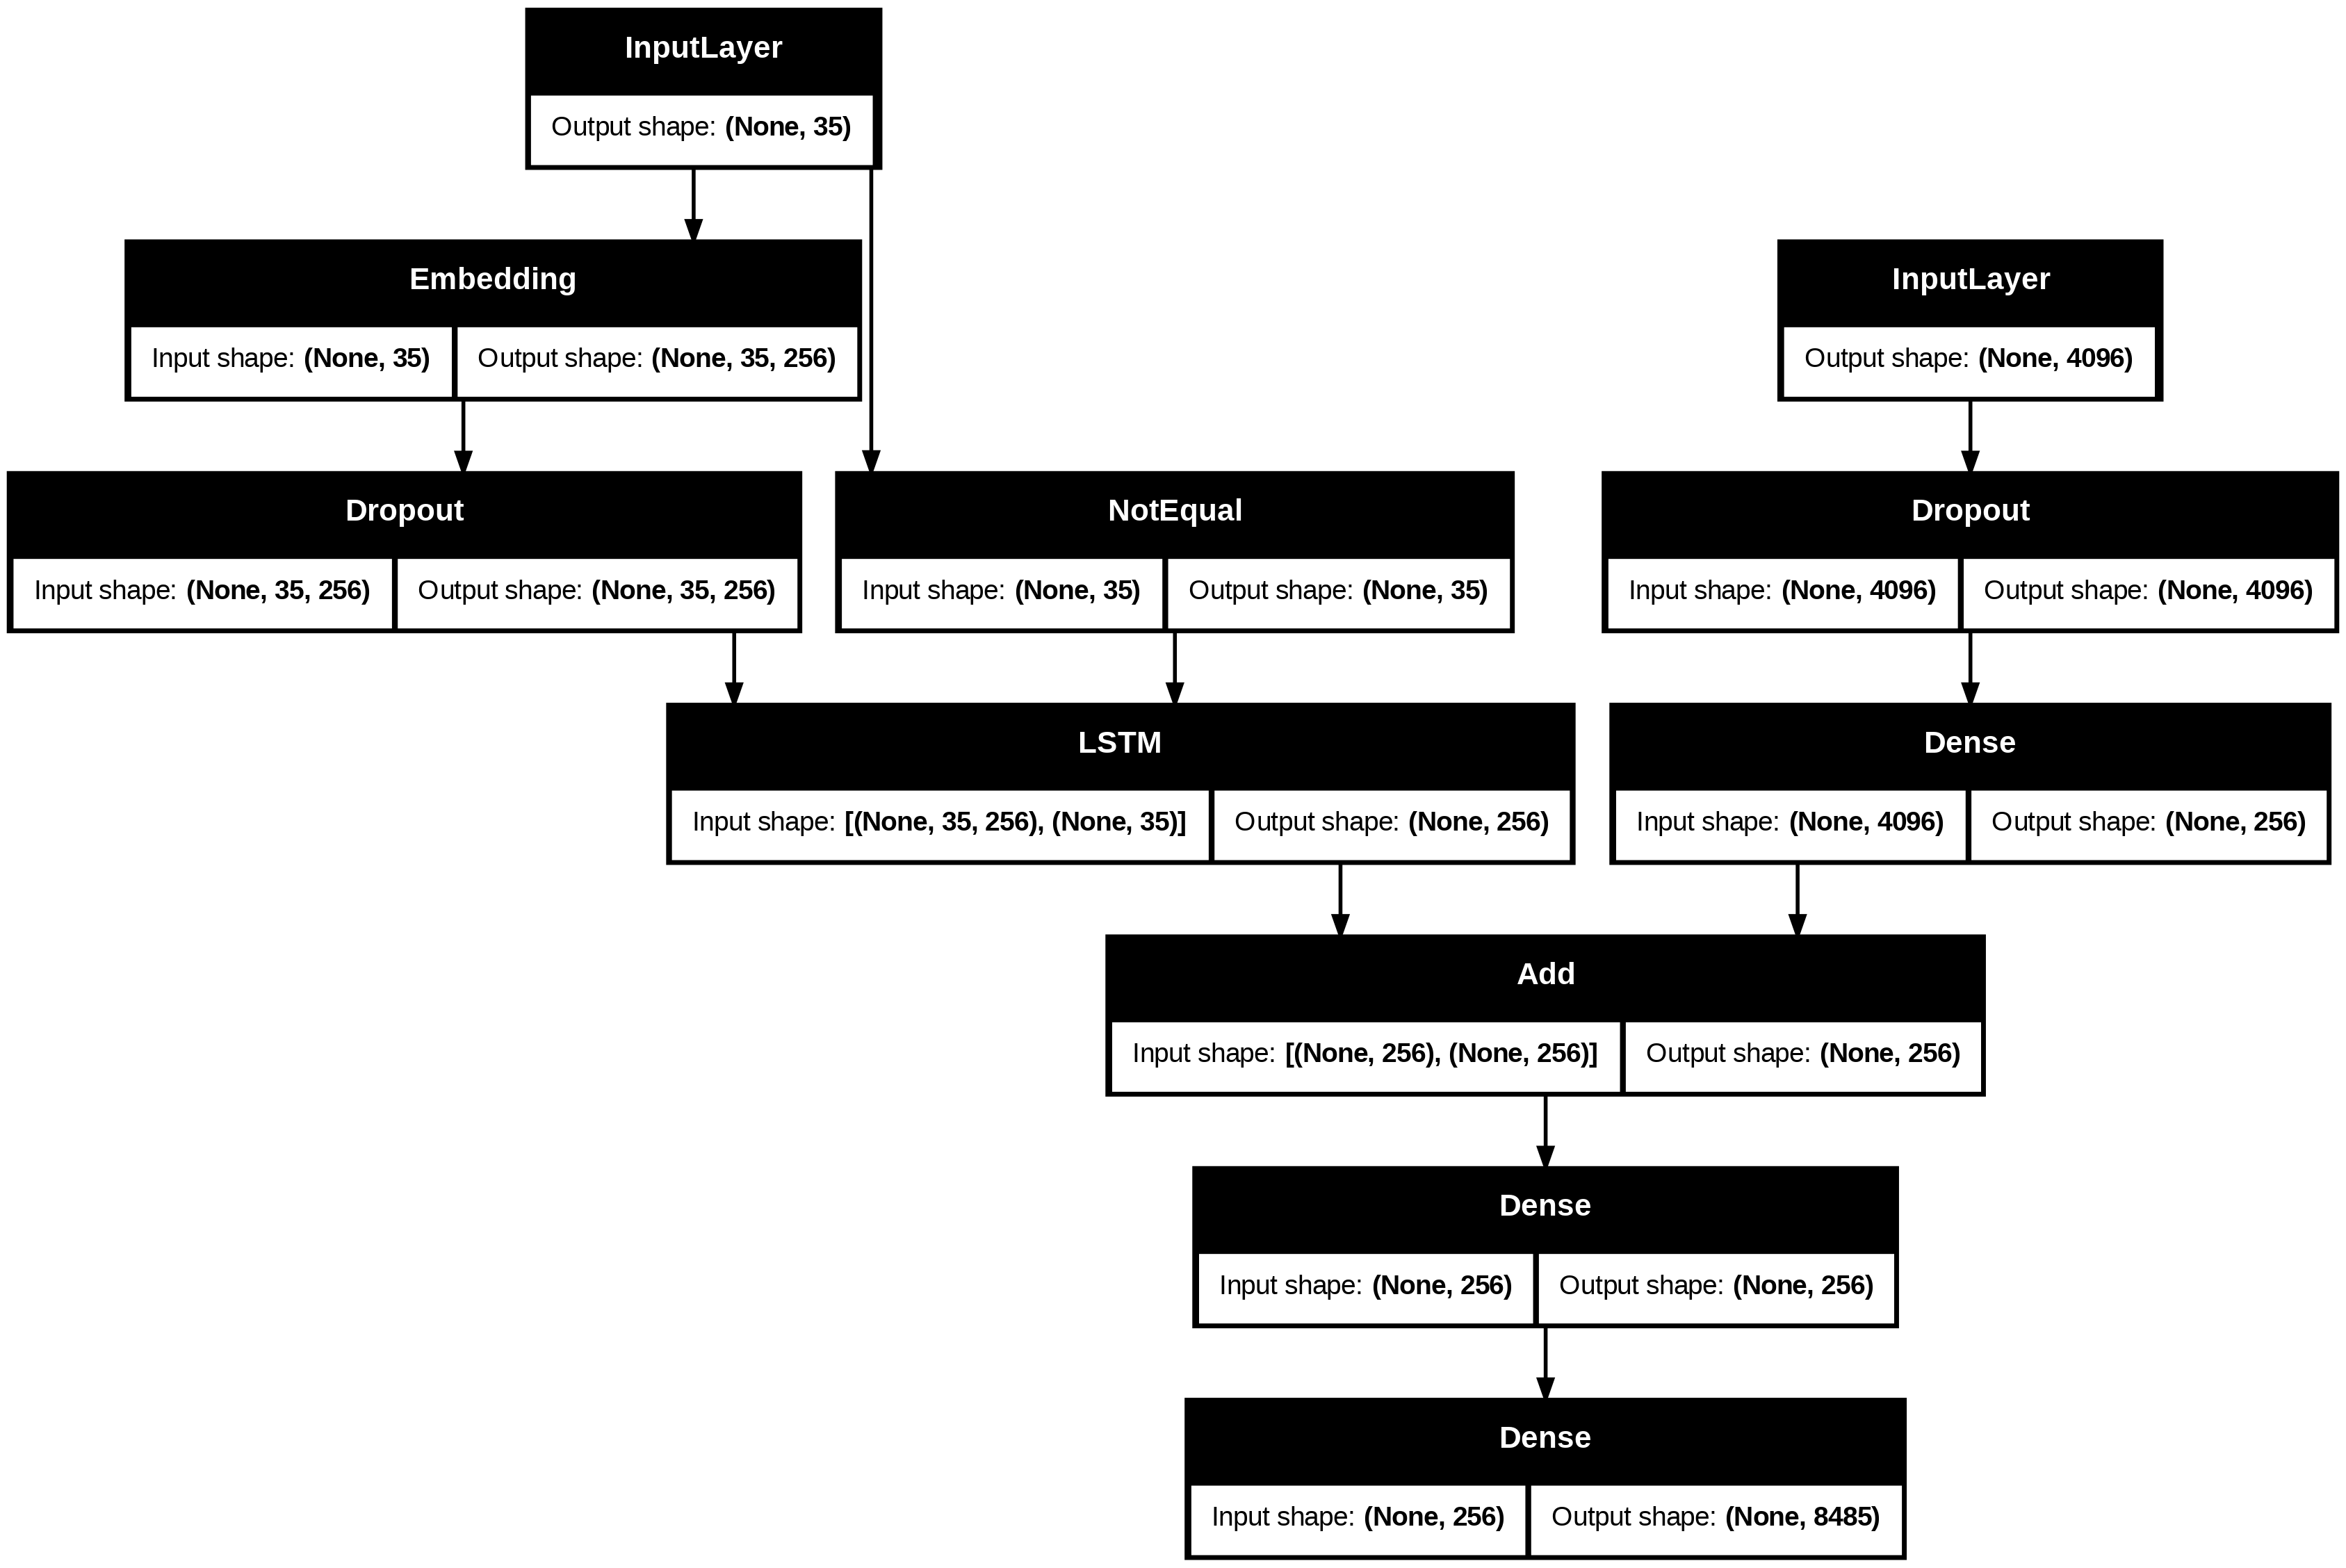

In [ ]:
inputs1 = Input(shape=(4096,))
img_fe = Dropout(0.4)(inputs1)
img_features = Dense(256, activation='relu')(img_fe)

# sequence feature layers
inputs2 = Input(shape=(max_length,))
se1 = Embedding(vocab_size, 256, mask_zero=True)(inputs2)
se2 = Dropout(0.4)(se1)
sequence_features = LSTM(256)(se2)

# decoder model
decoder1 = add([img_features, sequence_features])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(vocab_size, activation='softmax')(decoder2)

model = Model(inputs=[inputs1,inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot the model
plot_model(model, show_shapes=True)

In [ ]:
epochs = 20
batch_size = 32
steps_per_epoch = len(train_set) // batch_size
for i in range(epochs):
    # create data generator
    generator = data_generator(train_set ,mapping, features, tokenizer, max_length, vocab_size, batch_size)
    # fit for one epoch
    model.fit(generator, epochs=1, steps_per_epoch=steps_per_epoch, verbose=1)

227/227 ━━━━━━━━━━━━━━━━━━━━ 57s 226ms/step - loss: 5.7745
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 229ms/step - loss: 4.0478
227/227 ━━━━━━━━━━━━━━━━━━━━ 51s 225ms/step - loss: 3.5705
227/227 ━━━━━━━━━━━━━━━━━━━━ 51s 224ms/step - loss: 3.2945
227/227 ━━━━━━━━━━━━━━━━━━━━ 51s 225ms/step - loss: 3.1000
227/227 ━━━━━━━━━━━━━━━━━━━━ 51s 226ms/step - loss: 2.9466
227/227 ━━━━━━━━━━━━━━━━━━━━ 51s 226ms/step - loss: 2.8319
227/227 ━━━━━━━━━━━━━━━━━━━━ 50s 222ms/step - loss: 2.7406
227/227 ━━━━━━━━━━━━━━━━━━━━ 51s 227ms/step - loss: 2.6640
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 228ms/step - loss: 2.5983
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 227ms/step - loss: 2.5294
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 229ms/step - loss: 2.4725
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 228ms/step - loss: 2.4247
227/227 ━━━━━━━━━━━━━━━━━━━━ 52s 228ms/step - loss: 2.3751
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 233ms/step - loss: 2.3249
227/227 ━━━━━━━━━━━━━━━━━━━━ 53s 232ms/step - loss: 2.2878
227/227 ━━━━━━━━━━━━━━━━━━━━ 50s 220ms/step - loss: 2.25

In [ ]:
model.save("best_model.h5")

In [ ]:
def index_to_word(index,tokenizer):
    for word,i in tokenizer.word_index.items():
        if i == index:
            return word
    return None

In [ ]:
def predict_caption(model, image_feature, tokenizer, max_length):
    in_text = "startseq"

    # convert image to correct type/shape
    image = np.array(image_feature, dtype='float32')
    if image.ndim == 1:
        image = image.reshape(1, -1)

    # convert to tensor with explicit shape
    image = tf.convert_to_tensor(image, dtype=tf.float32)

    for _ in range(max_length):
        # prepare sequence
        seq = tokenizer.texts_to_sequences([in_text])[0]
        seq = pad_sequences([seq], maxlen=max_length, dtype='int32')
        seq = tf.convert_to_tensor(seq, dtype=tf.int32)

        # predict next word
        yhat = model([image, seq], training=False)   # use model() instead of model.predict()
        yhat = tf.argmax(yhat, axis=-1).numpy()[0]

        word = index_to_word(yhat, tokenizer)
        if word is None or word == "endseq":
            break
        in_text += " " + word

    return in_text

In [ ]:
actual, predicted = list(), list()

for img in tqdm(test_set):
    if img not in features:      # safety check
        continue
    # get actual caption
    actual_captions = mapping[img]
    # predicted caption
    pred_caption = predict_caption(model, features[img], tokenizer, max_length)
    # split into words
    actual_caption_word = [caption.split() for caption in actual_captions]
    pred_caption_word = pred_caption.split()
    # append to list
    actual.append(actual_caption_word)
    predicted.append(pred_caption_word)

100%|██████████| 810/810 [22:53<00:00,  1.70s/it]


In [ ]:
from nltk.translate.bleu_score import corpus_bleu, SmoothingFunction
smooth_fn = SmoothingFunction().method1

In [ ]:
bleu1 = corpus_bleu(actual, predicted, weights=(1, 0, 0, 0), smoothing_function=smooth_fn)
bleu2 = corpus_bleu(actual, predicted, weights=(0.5, 0.5, 0, 0), smoothing_function=smooth_fn)
print("BLEU-1:", bleu1)
print("BLEU-2:", bleu2)

BLEU-1: 0.4853896709745338
BLEU-2: 0.2853960529429368


In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

In [ ]:
def generate_caption(image_name):
    # Extract image ID
    image_id = image_name.split('.')[0]

    # Load image from "Images" folder
    image_path = os.path.join(IMAGE_DIR, image_name)
    image = Image.open(image_path)

    # Predict caption
    y_pred = predict_caption(model, features[image_id], tokenizer, max_length)

    # Display image and predicted caption
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.title(f"Predicted Caption:\n{y_pred}", fontsize=12, color='blue')
    plt.show()


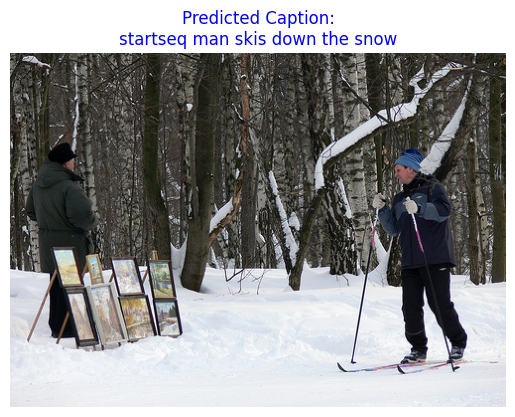

In [ ]:
generate_caption("101669240_b2d3e7f17b.jpg")

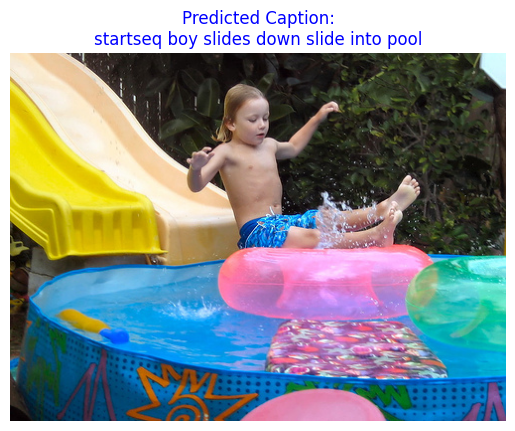

In [ ]:
generate_caption("1077546505_a4f6c4daa9.jpg")

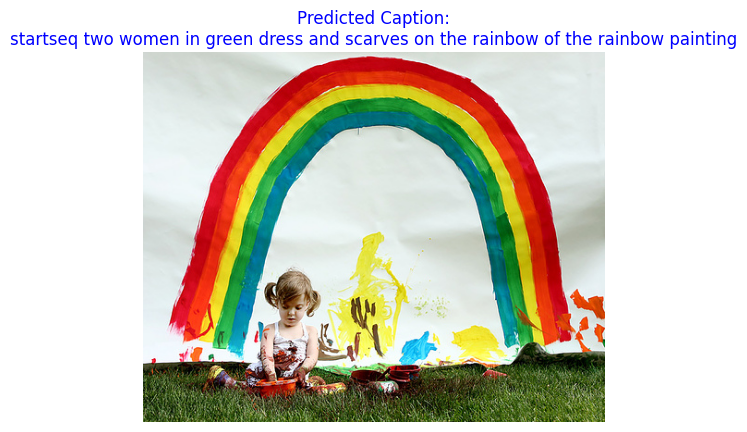

In [ ]:
generate_caption("1002674143_1b742ab4b8.jpg")

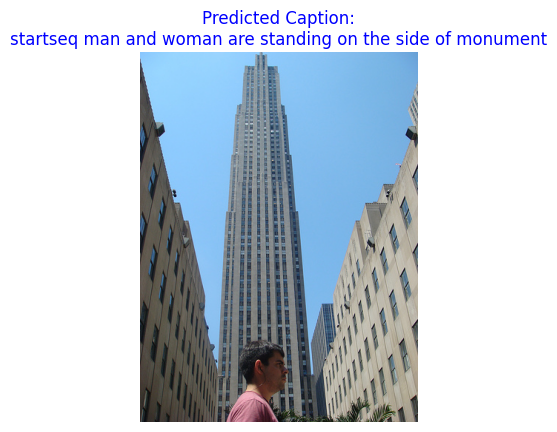

In [ ]:
generate_caption("1032460886_4a598ed535.jpg")

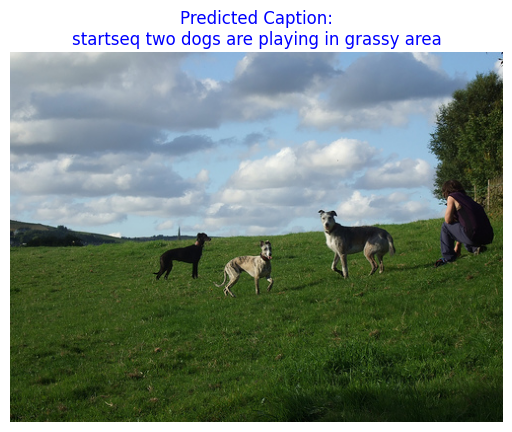

In [ ]:
generate_caption("1032122270_ea6f0beedb.jpg")

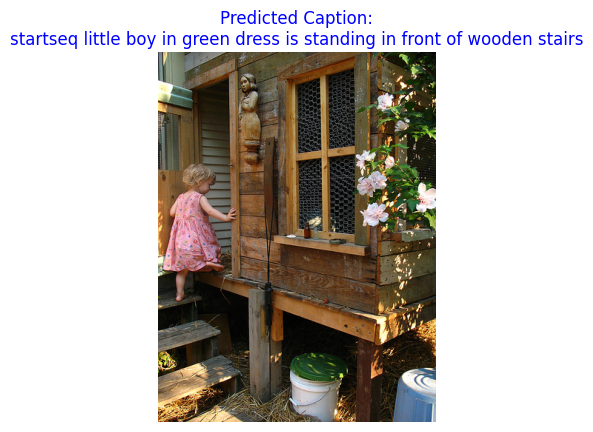

In [ ]:
generate_caption("1000268201_693b08cb0e.jpg")

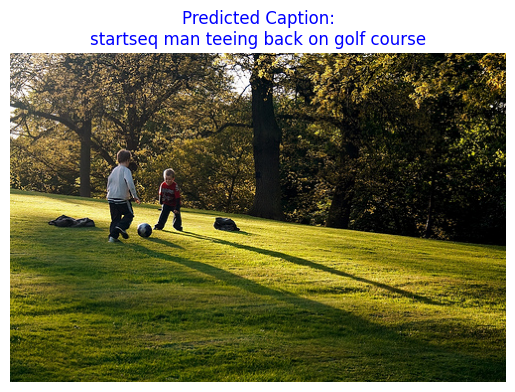

In [ ]:
generate_caption("197504190_fd1fc3d4b7.jpg")